In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# "Webpage Load" Data Analysis 

##### Link: (https://ieee-dataport.org/open-access/5gophers-v10-commercial-5g-network-performance)

In [3]:
#read the dataset
dataset = pd.read_csv("real-tests (landing pages).csv")

In [4]:
#print the first 5 rows
dataset.head()

,record_id,page_name,radio_type,page_load_time_in_sec,page_size_in_bytes,number_of_assets
0,1,Bing-H,4G,797.816,581990,63
1,2,Bing-H,4G,593.745,577731,58
2,3,Bing-H,4G,922.908,509105,62
3,4,Bing-H,4G,601.726,507004,58
4,5,Bing-H,4G,674.718,507773,62


In [5]:
#length of the dataset
len(dataset)

680

In [6]:
dataset["radio_type"].value_counts()

4G    340
5G    340
Name: radio_type, dtype: int64

In [7]:
#print categories in "page_name" column
print(dataset["page_name"].unique())

['Bing-H' 'Wiki' 'Bing-S' 'GG-H' 'FB' 'TW' 'YT' 'eBay' 'GG-S' 'YH' 'SF-H'
 'SF-P' 'AMZ' 'Fox' 'NYT' 'Dropbox' 'CNN']


In [8]:
#print categories in "radio_type" column
print(dataset["radio_type"].unique())

['4G' '5G']


In [9]:
#find max value in column "page_load"
dataset["page_load_time_in_sec"].max()

13144.004

In [10]:
#find index of the row with max value in column "page_load"
dataset["page_load_time_in_sec"].idxmax()

640

In [11]:
#print the row with max value in column "page_load"
dataset.loc[640]

record_id                      641
page_name                      CNN
radio_type                      4G
page_load_time_in_sec    13144.004
page_size_in_bytes        16714535
number_of_assets               454
Name: 640, dtype: object

In [12]:
#find max value in column "page_size"
dataset["page_size_in_bytes"].max()

20438953

In [13]:
#find index of the row with max value in column "page_size"
dataset["page_size_in_bytes"].idxmax()

585

In [14]:
#print the row with max value in column "page_size"
dataset.loc[585]

record_id                     586
page_name                     NYT
radio_type                     5G
page_load_time_in_sec    5267.913
page_size_in_bytes       20438953
number_of_assets              285
Name: 585, dtype: object

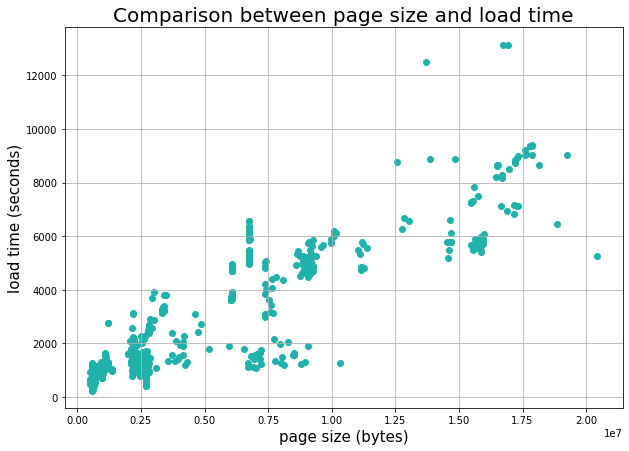

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

ax.scatter(dataset["page_size_in_bytes"], dataset["page_load_time_in_sec"], color="lightseagreen")

ax.set_title("Comparison between page size and load time", fontsize=20)
ax.set_xlabel("page size (bytes)", fontsize=15)
ax.set_ylabel("load time (seconds)", fontsize=15)

ax.grid()
plt.show()

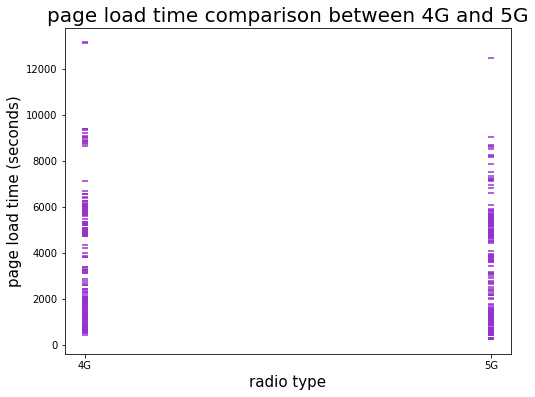

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

ax.scatter(x=dataset["radio_type"], y=dataset["page_load_time_in_sec"], color="darkorchid", marker='_')

ax.set_title("page load time comparison between 4G and 5G", fontsize=20)
ax.set_xlabel("radio type", fontsize=15)
ax.set_ylabel("page load time (seconds)", fontsize=15)

#ax.grid()
plt.show()

In [26]:
agg_data = dataset.groupby("page_name").agg({"page_load_time_in_sec":['max'], "page_size_in_bytes":['max']})

In [27]:
display(agg_data)

,page_load_time_in_sec,page_size_in_bytes
,max,max
page_name,,
AMZ,2386.239,10337006
Bing-H,922.908,646080
Bing-S,1000.538,689603
CNN,13144.004,19230838
Dropbox,7115.051,16671901
FB,2781.078,1369985
Fox,5846.350,9381430
GG-H,1292.364,994563


Text(0, 0.5, '(scaled by log)')

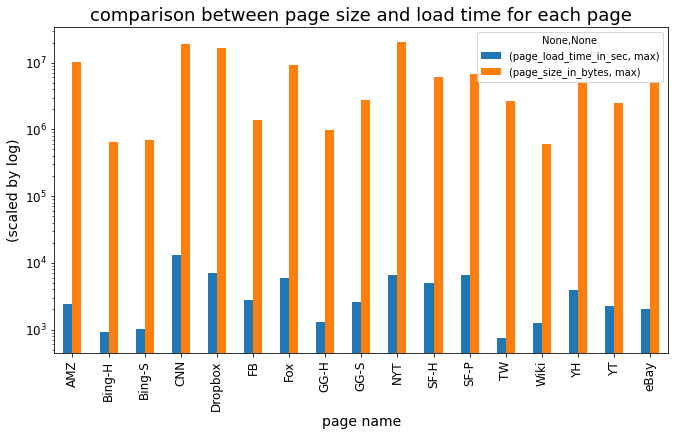

In [71]:
# fig, ax=plt.subplots()
# fig.set_size_inches(10,8)

# ax.bar(agg_data, height=agg_data['page_load_time_in_sec'])
ax = agg_data.plot(y=["page_load_time_in_sec", "page_size_in_bytes"],kind='bar', logy=True,
                  figsize=(11,6), fontsize=12)

ax.set_title("comparison between page size and load time for each page", fontsize=18)
ax.set_xlabel("page name", fontsize=14)
ax.set_ylabel("(scaled by log)", fontsize=14)

# "Download while driving" data analysis

##### link: (https://github.com/uccmisl/5Gdataset)

In [2]:
df_dl = pd.read_csv("B_2019.12.14_10.16.30.csv")

In [3]:
df_dl.head()

,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,State,PINGAVG,PINGMIN,PINGMAX,PINGSTDEV,PINGLOSS,CELLHEX,NODEHEX,LACHEX,RAWCELLID,NRxRSRP,NRxRSRQ
0,2019.12.14_10.16.30,-8.388186,51.935604,0,B,12,5G,-99,-15,6.0,12,-90,7,1,D,-,-,-,-,-,C,A81B,9CBA,11016972,-100.0,-15.0
1,2019.12.14_10.16.31,-8.388470,51.935739,1,B,12,5G,-99,-15,6.0,12,-90,7,1,D,-,-,-,-,-,C,A81B,9CBA,11016972,-100.0,-15.0
2,2019.12.14_10.16.31,-8.388470,51.935739,1,B,12,5G,-99,-15,6.0,12,-90,0,0,D,-,-,-,-,-,C,A81B,9CBA,11016972,-100.0,-15.0
3,2019.12.14_10.16.32,-8.388470,51.935739,1,B,12,5G,-102,-14,6.0,12,-90,0,0,D,-,-,-,-,-,C,A81B,9CBA,11016972,-99.0,-15.0
4,2019.12.14_10.16.33,-8.388470,51.935739,1,B,12,5G,-102,-14,6.0,12,-90,9,12,D,-,-,-,-,-,C,A81B,9CBA,11016972,-99.0,-15.0


In [28]:
df_dl.iloc[700]

Timestamp       2019.12.14_10.28.18
Longitude                 -8.427827
Latitude                  51.915413
Speed                            17
Operatorname                      B
CellID                            3
NetworkMode                     LTE
RSRP                           -107
RSRQ                            -13
SNR                             7.0
CQI                               9
RSSI                            -86
DL_bitrate                     4295
UL_bitrate                       66
State                             D
PINGAVG                           -
PINGMIN                           -
PINGMAX                           -
PINGSTDEV                         -
PINGLOSS                          -
CELLHEX                           3
NODEHEX                        A99B
LACHEX                         9CBA
RAWCELLID                  11115267
NRxRSRP                      -116.0
NRxRSRQ                       -12.0
Name: 700, dtype: object

In [4]:
df_dl.iloc[1154]

Timestamp       2019.12.14_10.35.52
Longitude                 -8.472606
Latitude                   51.91637
Speed                            26
Operatorname                      B
CellID                        52106
NetworkMode                   HSPA+
RSRP                            -69
RSRQ                             -2
SNR                               -
CQI                               -
RSSI                              -
DL_bitrate                       11
UL_bitrate                        0
State                             D
PINGAVG                           -
PINGMIN                           -
PINGMAX                           -
PINGSTDEV                         -
PINGLOSS                          -
CELLHEX                        CB8A
NODEHEX                           C
LACHEX                         75AA
RAWCELLID                    838538
NRxRSRP                       -51.0
NRxRSRQ                       -24.0
Name: 1154, dtype: object

In [5]:
len(df_dl)

1155

In [6]:
df_dl["DL_bitrate"].idxmax()

438

In [7]:
df_dl.iloc[438]

Timestamp       2019.12.14_10.23.56
Longitude                 -8.410035
Latitude                  51.922348
Speed                            48
Operatorname                      B
CellID                           12
NetworkMode                      5G
RSRP                            -81
RSRQ                             -7
SNR                            11.0
CQI                              14
RSSI                            -64
DL_bitrate                    96925
UL_bitrate                      237
State                             D
PINGAVG                           -
PINGMIN                           -
PINGMAX                           -
PINGSTDEV                         -
PINGLOSS                          -
CELLHEX                           C
NODEHEX                        A99B
LACHEX                         9CBA
RAWCELLID                  11115276
NRxRSRP                       -76.0
NRxRSRQ                        -9.0
Name: 438, dtype: object

In [8]:
df_dl["UL_bitrate"].idxmax()

477

In [9]:
df_dl.iloc[477]

Timestamp       2019.12.14_10.24.32
Longitude                 -8.415932
Latitude                  51.919754
Speed                            57
Operatorname                      B
CellID                           13
NetworkMode                      5G
RSRP                            -81
RSRQ                             -7
SNR                            29.0
CQI                              14
RSSI                              -
DL_bitrate                    82755
UL_bitrate                      758
State                             D
PINGAVG                           -
PINGMIN                           -
PINGMAX                           -
PINGSTDEV                         -
PINGLOSS                          -
CELLHEX                           D
NODEHEX                        A99B
LACHEX                         9CBA
RAWCELLID                  11115277
NRxRSRP                       -82.0
NRxRSRQ                        -5.0
Name: 477, dtype: object

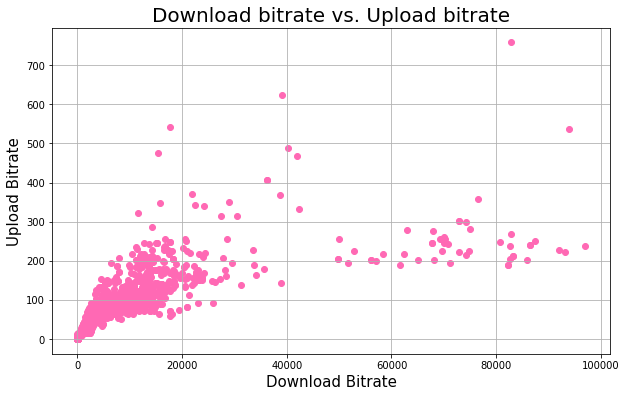

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(10,6)

ax.scatter(df_dl["DL_bitrate"], df_dl["UL_bitrate"], color="hotpink")

ax.set_title("Download bitrate vs. Upload bitrate", fontsize=20)
ax.set_xlabel("Download Bitrate", fontsize=15)
ax.set_ylabel("Upload Bitrate", fontsize=15)

ax.grid()
plt.show()

In [11]:
import gmplot
import IPython

In [24]:
gmap1 = gmplot.GoogleMapPlotter(51.9245174, -8.4095085, 13)
gmap1.scatter(df_dl["Latitude"], df_dl["Longitude"], color="mediumseagreen", size=30, marker=False)
gmap1.draw("GoogleMaps.html")


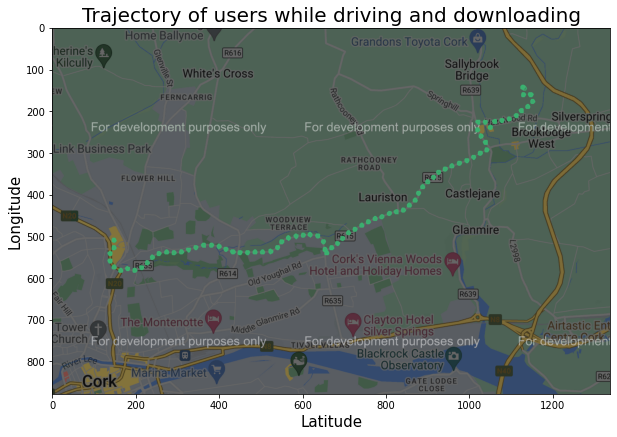

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(10,8)

im = plt.imread('Irland.png')


ax.set_title("Trajectory of users while driving and downloading", fontsize=20)
ax.set_xlabel("Latitude", fontsize=15)
ax.set_ylabel("Longitude", fontsize=15)

plt.imshow(im)

In [26]:
%%html
<a href="GoogleMaps.html">link to the google maps</a>

# Packet data analysis

##### link: https://github.com/Western-OC2-Lab/5G-Core-Networks-Datasets

In [22]:
df_packet = pd.read_csv("Dataset2.csv")

In [23]:
df_packet.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,10,20:09:07.212252400,192.168.0.19,192.168.0.12,HTTP2,132,HEADERS[207959]
1,11,20:09:07.212252500,192.168.0.19,192.168.0.12,HTTP2,147,DATA[207959]
2,12,20:09:07.212750800,192.168.0.12,192.168.0.19,TCP,66,7777 > 54126 [ACK] Seq=1 Ack=148 Win=501 Len...
3,13,20:09:07.212750800,192.168.0.12,192.168.0.19,HTTP2,101,HEADERS[207959]: 204 No Content
4,14,20:09:07.212948900,192.168.0.19,192.168.0.12,TCP,66,54126 > 7777 [ACK] Seq=148 Ack=36 Win=501 Le...
